# Importing Relevant Libraries

In [488]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Loading the Dataset

In [491]:
df = pd.read_csv('SouthGermanCredit.asc', sep=r'\s+')
print (df.dtypes)

laufkont    int64
laufzeit    int64
moral       int64
verw        int64
hoehe       int64
sparkont    int64
beszeit     int64
rate        int64
famges      int64
buerge      int64
wohnzeit    int64
verm        int64
alter       int64
weitkred    int64
wohn        int64
bishkred    int64
beruf       int64
pers        int64
telef       int64
gastarb     int64
kredit      int64
dtype: object


In [493]:
#translating the columns and saving the dataset to CSV file 
german_to_english = {
    'laufkont': 'checking_account_status',
    'laufzeit': 'loan_duration_months',
    'moral': 'credit_history',
    'verw': 'purpose',
    'hoehe': 'credit_amount',
    'sparkont': 'savings_account_status',
    'beszeit': 'employment_duration',
    'rate': 'installment_rate',
    'famges': 'personal_status_sex',
    'buerge': 'guarantor',
    'wohnzeit': 'current_residence_duration',
    'verm': 'property',
    'alter': 'age',
    'weitkred': 'other_installment_plans',
    'wohn': 'housing',
    'bishkred': 'existing_credits_count',
    'beruf': 'job',
    'pers': 'dependents_count',
    'telef': 'telephone',
    'gastarb': 'foreign_worker',
    'kredit': 'credit_status'  
}
df.rename(columns=german_to_english, inplace=True)

#saving the dataset
df.to_csv("SouthGermanCredit_English.csv", index=False)
        

In [495]:
# Loading dataset
dataset = pd.read_csv('SouthGermanCredit_English.csv')
print (dataset.dtypes)

checking_account_status       int64
loan_duration_months          int64
credit_history                int64
purpose                       int64
credit_amount                 int64
savings_account_status        int64
employment_duration           int64
installment_rate              int64
personal_status_sex           int64
guarantor                     int64
current_residence_duration    int64
property                      int64
age                           int64
other_installment_plans       int64
housing                       int64
existing_credits_count        int64
job                           int64
dependents_count              int64
telephone                     int64
foreign_worker                int64
credit_status                 int64
dtype: object


# Exploratory Data Analysis (EDA) and Preprocessing

In [498]:
# dropping some unrelated columns to improve the performnace of our model 
columns_to_drop = [
    "installment_rate", "guarantor", "current_residence_duration",
    "other_installment_plans", "job", "dependents_count", 
    "telephone", "foreign_worker"
]
dataset = dataset.drop(columns=columns_to_drop)

In [500]:
dataset.shape

(1000, 13)

In [502]:
print (dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   checking_account_status  1000 non-null   int64
 1   loan_duration_months     1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   credit_amount            1000 non-null   int64
 5   savings_account_status   1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   personal_status_sex      1000 non-null   int64
 8   property                 1000 non-null   int64
 9   age                      1000 non-null   int64
 10  housing                  1000 non-null   int64
 11  existing_credits_count   1000 non-null   int64
 12  credit_status            1000 non-null   int64
dtypes: int64(13)
memory usage: 101.7 KB
None


In [504]:
dataset.head()

,checking_account_status,loan_duration_months,credit_history,purpose,credit_amount,savings_account_status,employment_duration,personal_status_sex,property,age,housing,existing_credits_count,credit_status
0,1,18,4,2,1049,1,2,2,2,21,1,1,1
1,1,9,4,0,2799,1,3,3,1,36,1,2,1
2,2,12,2,9,841,2,4,2,1,23,1,1,1
3,1,12,4,0,2122,1,3,3,1,39,1,2,1
4,1,12,4,0,2171,1,3,3,2,38,2,2,1


In [506]:
dataset.describe()

,checking_account_status,loan_duration_months,credit_history,purpose,credit_amount,savings_account_status,employment_duration,personal_status_sex,property,age,housing,existing_credits_count,credit_status
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.68200,2.358000,35.54200,1.928000,1.407000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,0.70808,1.050209,11.35267,0.530186,0.577654,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.00000,1.000000,19.00000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.00000,1.000000,27.00000,2.000000,1.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.00000,2.000000,33.00000,2.000000,1.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,3.00000,3.000000,42.00000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.00000,4.000000,75.00000,3.000000,4.000000,1.000000


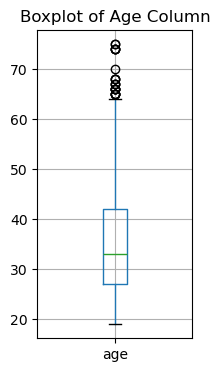

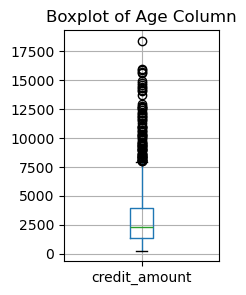

In [508]:
#there is a signicant presense of outlier in credit_amount and age column we will futher confirm this with a Boxplot 

# Plot boxplot for the 'age' column
plt.figure(figsize=(2, 4))
dataset.boxplot(column=['age'])
plt.title("Boxplot of Age Column")
plt.show()

# Plot boxplot for the 'age' column
plt.figure(figsize=(2, 3))
dataset.boxplot(column=['credit_amount'])
plt.title("Boxplot of Age Column")
plt.show()

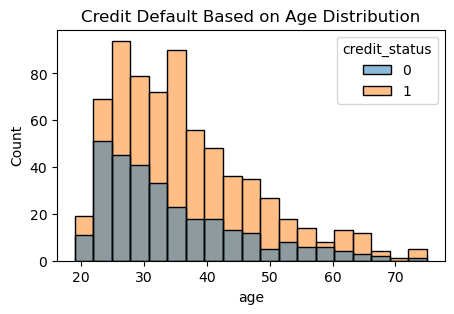

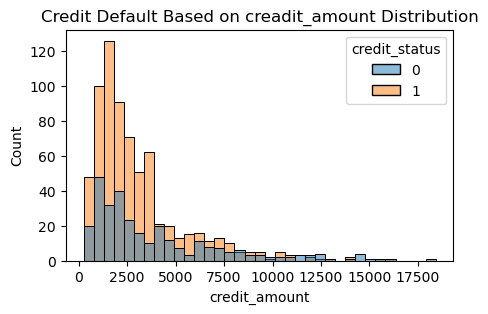

In [510]:
#we can further explore age distribution to wards loan default, as well as credit amount towards defaut. 

# Plot histogram of age distribution with credit default status
plt.figure(figsize=(5, 3))
plt.title("Credit Default Based on Age Distribution")
sns.histplot(x="age", hue="credit_status", data=dataset)
plt.show()

# Plot histogram of age distribution with credit default status
plt.figure(figsize=(5, 3))
plt.title("Credit Default Based on creadit_amount Distribution")
sns.histplot(x="credit_amount", hue="credit_status", data=dataset)
plt.show()

Class Counts for 'Target Varriable':
credit_status
1    700
0    300
Name: count, dtype: int64


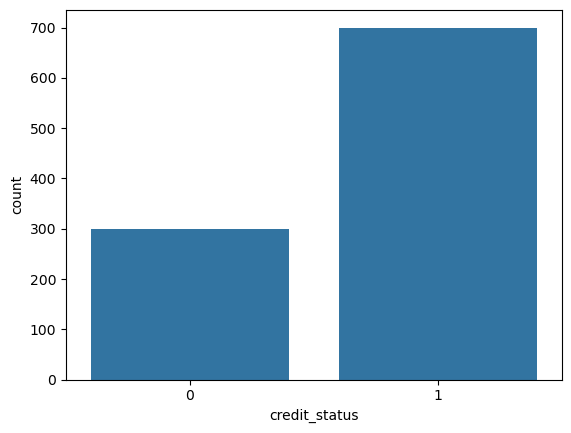

In [512]:
# Viewing counts of class imbalance on the target class
class_counts = dataset['credit_status'].value_counts()

print("Class Counts for 'Target Varriable':")
print(class_counts)

# Visualizing the class imbalance
sns.countplot(data=dataset, x="credit_status")
plt.show()

# K-Nearest Neighbors 

In [515]:
# Define the column indices or names
X_columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
y_column = 12

# Select the columns from the dataset
X = dataset.iloc[:, X_columns].values
y = dataset.iloc[:, y_column].values

# Print the column names
print("Features (X) columns:")
print(dataset.columns[X_columns])
print("\nTarget (y) column:")
print(dataset.columns[y_column])

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Features (X) columns:
Index(['loan_duration_months', 'credit_history', 'purpose', 'credit_amount',
       'savings_account_status', 'employment_duration', 'personal_status_sex',
       'property', 'age', 'housing', 'existing_credits_count'],
      dtype='object')

Target (y) column:
credit_status


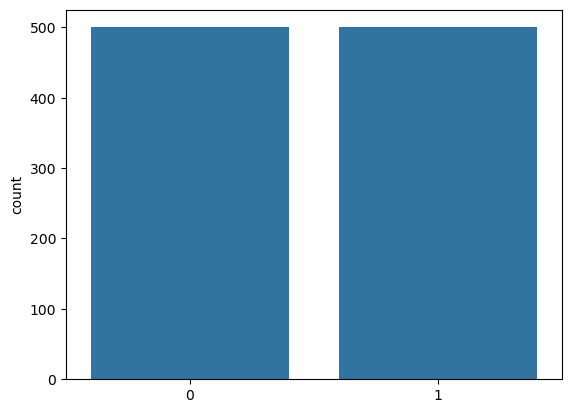

In [517]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

# Handling Class Imbalance using RandomOverSampler
resampler = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)

# Visualizing the resampled class distribution
sns.countplot(x=y_train_resampled)
plt.show()

In [519]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train_resampled)
X_test_s = sc.transform(X_test)

In [521]:
#fitting the training set in to KNN classifier 
from sklearn.neighbors import KNeighborsClassifier
# KNN Classifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train_s, y_train_resampled)

# Making predictions
y_pred = classifier.predict(X_test_s)

In [523]:
# Evaluating and Predicting the Test set results
y_pred = classifier.predict(X_test_s)
print(y_pred)

[1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1
 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1
 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1
 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0
 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0
 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0
 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1
 1 0 1 1]


In [525]:
print(y_test)

[0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0
 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0
 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0
 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0
 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1
 0 0 1 1]


In [527]:
from sklearn import metrics

# Calculate accuracy
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.2f}\n')
# Calculate confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm, '\n')
print('=========================================================')
# Calculate classification report
result = metrics.classification_report(y_test, y_pred)
print('Classification Report: \n')
print(result)

Accuracy: 0.64

Confusion Matrix:
[[ 52  48]
 [ 61 139]] 

Classification Report: 

              precision    recall  f1-score   support

           0       0.46      0.52      0.49       100
           1       0.74      0.69      0.72       200

    accuracy                           0.64       300
   macro avg       0.60      0.61      0.60       300
weighted avg       0.65      0.64      0.64       300



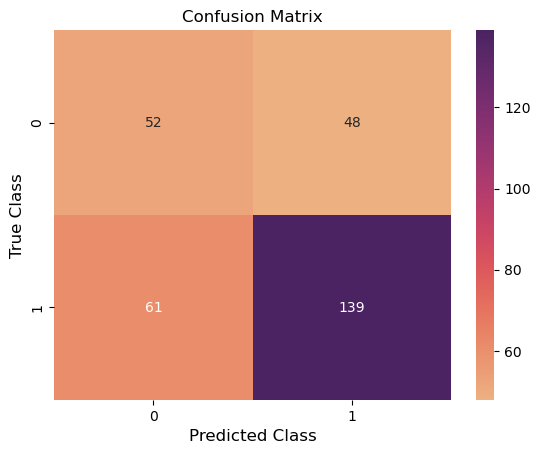

In [529]:
# Visualizing the Confusion matrix
ax = sns.heatmap(cm, cmap='flare', annot=True, fmt='d')
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.title("Confusion Matrix", fontsize=12)
plt.show()

# RandomForestClassifier

In [531]:
from sklearn.ensemble import RandomForestClassifier
# Deploying the RandomForestClassifier on the resampled data
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train_s, y_train_resampled)


RandomForestClassifier(random_state=0)

In [533]:
# Making predictions
y_pred_rf = rf.predict(X_test_s)

Accuracy: 0.71

Confusion Matrix:
[[ 37  63]
 [ 24 176]] 

Classification Report: 

              precision    recall  f1-score   support

           0       0.61      0.37      0.46       100
           1       0.74      0.88      0.80       200

    accuracy                           0.71       300
   macro avg       0.67      0.62      0.63       300
weighted avg       0.69      0.71      0.69       300



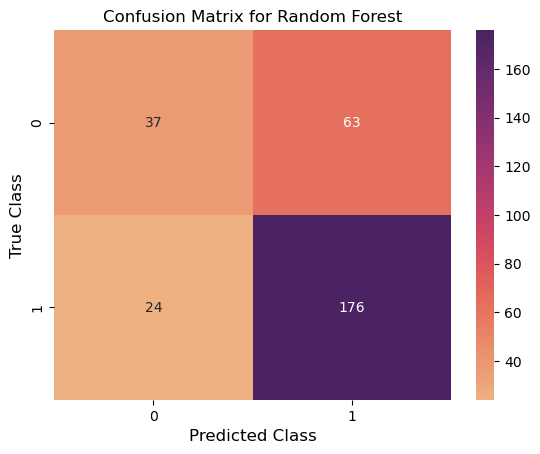

In [535]:
# Calculate accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {acc_rf:.2f}\n')

# Calculate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix:')
print(cm_rf, '\n')
print('=========================================================')
# Calculate classification report with zero_division parameter
result_rf = classification_report(y_test, y_pred_rf, zero_division=0)
print('Classification Report: \n')
print(result_rf)

# Plot the confusion matrix
ax = sns.heatmap(cm_rf, cmap='flare', annot=True, fmt='d')
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.title("Confusion Matrix for Random Forest", fontsize=12)
plt.show()

# Decision Tree 

In [538]:
from sklearn.tree import DecisionTreeClassifier

# Train the DecisionTreeClassifier on the resampled dataset
dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [540]:
# Making predictions
y_pred_dt = dt.predict(X_test)


Accuracy: 0.66

Confusion Matrix:
[[ 34  66]
 [ 36 164]] 

Classification Report: 

              precision    recall  f1-score   support

           0       0.49      0.34      0.40       100
           1       0.71      0.82      0.76       200

    accuracy                           0.66       300
   macro avg       0.60      0.58      0.58       300
weighted avg       0.64      0.66      0.64       300



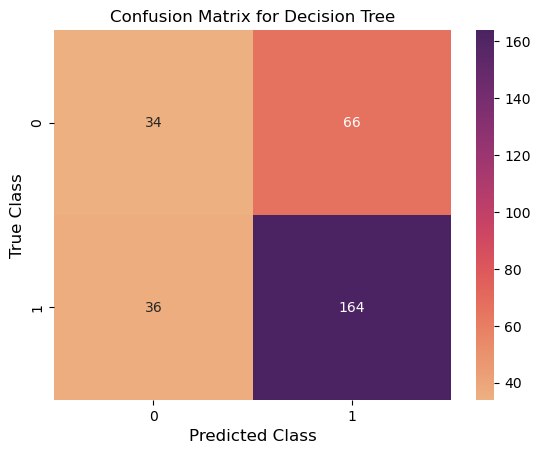

In [542]:
# Calculate accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {acc_dt:.2f}\n')

# Calculate confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print('Confusion Matrix:')
print(cm_dt, '\n')
print('=========================================================')
# Calculate classification report
result_dt = classification_report(y_test, y_pred_dt, zero_division=0)
print('Classification Report: \n')
print(result_dt)

# Plot the confusion matrix
ax = sns.heatmap(cm_dt, cmap='flare', annot=True, fmt='d')
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.title("Confusion Matrix for Decision Tree", fontsize=12)
plt.show()

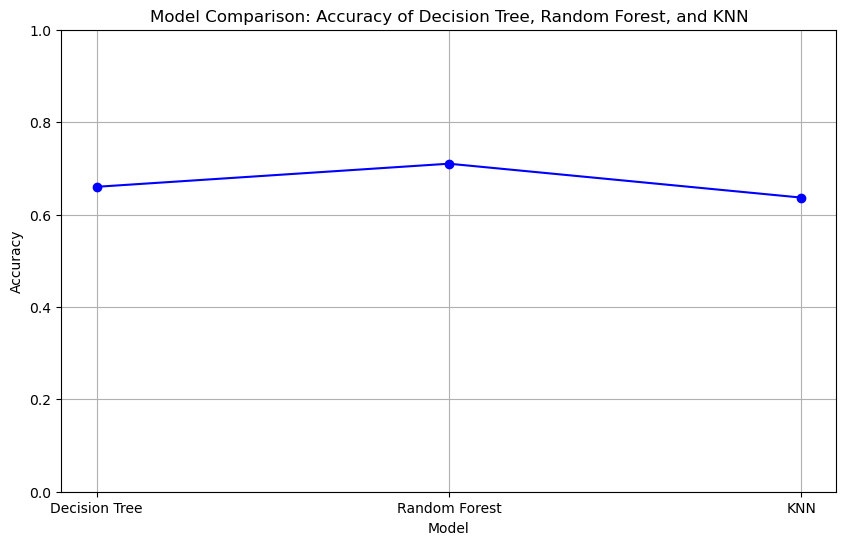

In [544]:
import matplotlib.pyplot as plt

# Assuming the accuracy values are already calculated
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_knn = metrics.accuracy_score(y_test, y_pred)

# Accuracy values
accuracies = [acc_dt, acc_rf, acc_knn]
models = ['Decision Tree', 'Random Forest', 'KNN']

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy of Decision Tree, Random Forest, and KNN')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Part Two 

# For Random Forest and RFECV

In [626]:
# Recall the  Standardized data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train_resampled)
X_test_s = sc.transform(X_test)

In [628]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

# Initialize RFECV with cross-validation and step size
rfecv = RFECV(estimator=rf, cv=5, step=1)

# Fit and transform the training data
X_train_fs = rfecv.fit_transform(X_train_s, y_train_resampled)

# Transform the test data
X_test_fs = rfecv.transform(X_test_s)

# Get selected features
selected_features = np.array(dataset.columns)[X_columns][rfecv.support_]
selected_features_count = sum(rfecv.support_)
print("Number of selected features:", selected_features_count)

Number of selected features: 11


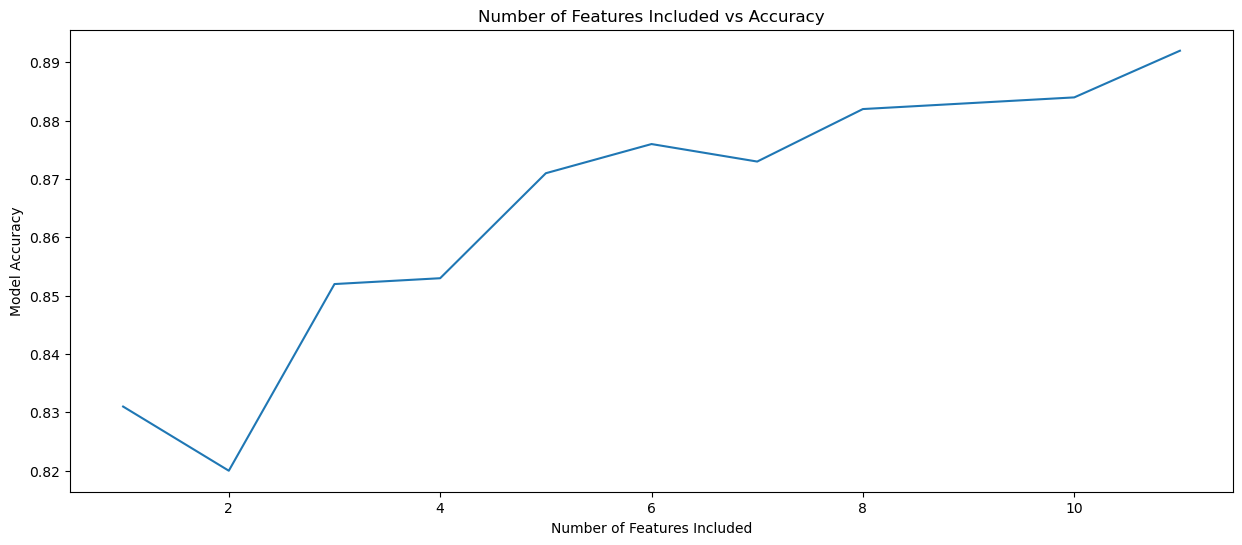

In [630]:
# using the mean_test_score  to plot the model accuracy against the number of features 

# Plotting accuracy against the number of features
plt.figure(figsize=(15, 6))
plt.title('Number of Features Included vs Accuracy')
plt.xlabel('Number of Features Included')
plt.ylabel('Model Accuracy')
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

In [632]:
# Train the model using the selected features
rf_selectedfeatures = RandomForestClassifier(random_state=0)
rf_selectedfeatures.fit(X_train_fs, y_train_resampled)


RandomForestClassifier(random_state=0)

In [634]:
# Make predictions on the test data
y_pred = rf_selectedfeatures.predict(X_test_fs)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Accuracy Score: 71.00%


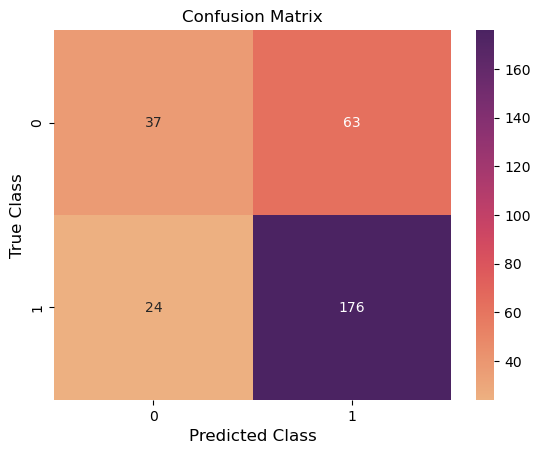

In [636]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
ax = sns.heatmap(cm, cmap='flare', annot=True, fmt='d')
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.title("Confusion Matrix", fontsize=12)
plt.show()

# Fine-tune the Random Forest model using a grid search for optimal parameters.

In [580]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
rf_tuned = RandomForestClassifier(random_state=0, class_weight='balanced')
grid_search = GridSearchCV(estimator=rf_tuned, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit on resampled training data with selected features
grid_search.fit(X_train_fs, y_train_resampled)

# Best parameters from Grid Search
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Re-train the model with best parameters
rf_optimized = RandomForestClassifier(random_state=0, class_weight='balanced', **best_params)
rf_optimized.fit(X_train_fs, y_train_resampled)

# Evaluate on the test set
y_pred_optimized = rf_optimized.predict(X_test_fs)
test_accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Improved Test Set Accuracy: {test_accuracy_optimized * 100:.2f}%")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Improved Test Set Accuracy: 70.00%


# for Decision Tree and RFECV

In [638]:
# For Decision tree and Rf
dt = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Initialize RFECV with cross-validation and step size

rfecv_dt = RFECV(estimator=dt, cv=5, step=1)

# Fit and transform the training data
X_train_fs_dt = rfecv_dt.fit_transform(X_train_resampled, y_train_resampled)

# Transform the test data
X_test_fs_dt = rfecv_dt.transform(X_test)

# Print the selected features
selected_features_dt = np.array(X_columns)[rfecv_dt.support_]
selected_features_count_dt = sum(rfecv_dt.support_)
print("Number of selected features:", selected_features_count_dt)

Number of selected features: 11


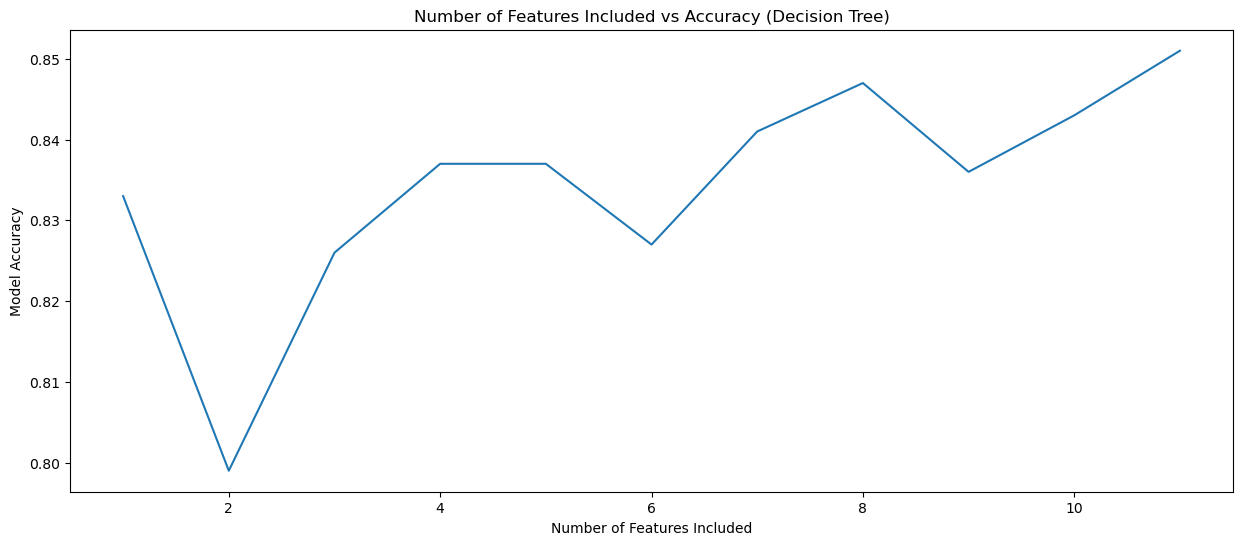

In [640]:
# Plot the model accuracy against the number of selected features for the decision tree
plt.figure(figsize=(15, 6))
plt.title('Number of Features Included vs Accuracy (Decision Tree)')
plt.xlabel('Number of Features Included')
plt.ylabel('Model Accuracy')
plt.plot(range(1, len(rfecv_dt.cv_results_['mean_test_score']) + 1), rfecv_dt.cv_results_['mean_test_score'])
plt.show()

In [642]:
# Train the Decision Tree model using the selected features
dt_selectedfeatures = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_selectedfeatures.fit(X_train_fs_dt, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Decision Tree Model Accuracy: 66.00%


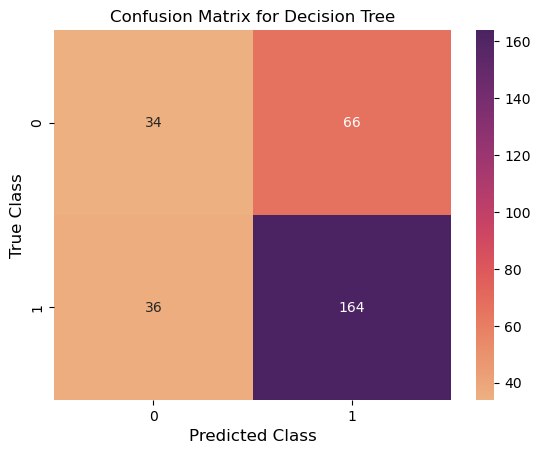

In [644]:
# Predict on the test set
y_pred_dt = dt_selectedfeatures.predict(X_test_fs_dt)

# Print the accuracy of the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Model Accuracy: {accuracy_dt * 100:.2f}%")

# Calculate the confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix
ax = sns.heatmap(cm_dt, cmap='flare', annot=True, fmt='d')
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.title("Confusion Matrix for Decision Tree", fontsize=12)
plt.show()

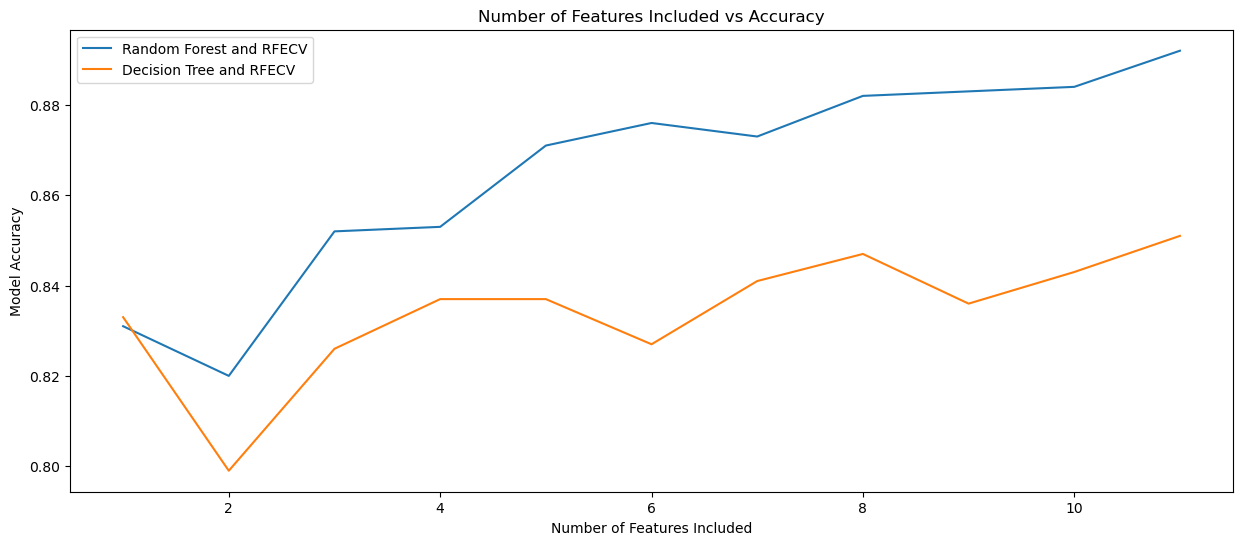

In [646]:
# Model Evaluation
import matplotlib.pyplot as plt

# Plot the model accuracy against the number of features for both Random Forest and Decision Tree with RFECV
plt.figure(figsize=(15, 6))
plt.title('Number of Features Included vs Accuracy')
plt.xlabel('Number of Features Included')
plt.ylabel('Model Accuracy')
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], label='Random Forest and RFECV')
plt.plot(range(1, len(rfecv_dt.cv_results_['mean_test_score']) + 1), rfecv_dt.cv_results_['mean_test_score'], label='Decision Tree and RFECV')
plt.legend()
plt.show()

# Stratified Splitting,Adjust Class Weights, Alternative Feature Selection

Decision Tree Model Accuracy: 61.00%


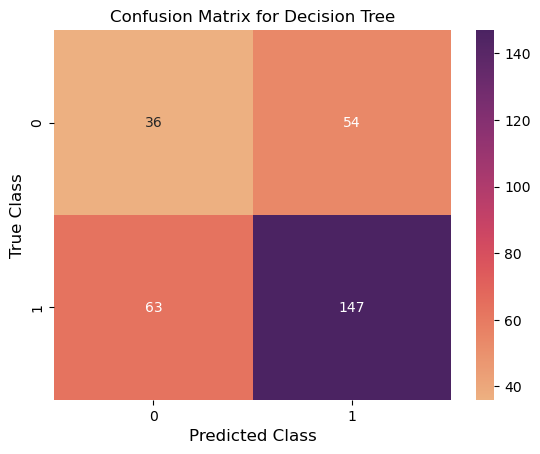

Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.40      0.38        90
           1       0.73      0.70      0.72       210

    accuracy                           0.61       300
   macro avg       0.55      0.55      0.55       300
weighted avg       0.62      0.61      0.62       300



In [680]:
from sklearn.feature_selection import RFECV, SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

X_columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
y_column = 12

# Select the columns from the dataset
X = dataset.iloc[:, X_columns].values
y = dataset.iloc[:, y_column].values

# splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Handling Class Imbalance using RandomOverSampler
resampler = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)

# adjusting class weights
dt = DecisionTreeClassifier(criterion='entropy', random_state=0, class_weight='balanced')

# alternative feature selection
rfecv_dt = RFECV(estimator=dt, cv=StratifiedKFold(n_splits=5), step=1)
X_train_fs_dt = rfecv_dt.fit_transform(X_train_resampled, y_train_resampled)
X_test_fs_dt = rfecv_dt.transform(X_test)
dt_selectedfeatures = DecisionTreeClassifier(criterion='entropy', random_state=0, class_weight='balanced')
dt_selectedfeatures.fit(X_train_fs_dt, y_train_resampled)
y_pred_dt = dt_selectedfeatures.predict(X_test_fs_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print the accuracy of the model
print(f"Decision Tree Model Accuracy: {accuracy_dt * 100:.2f}%")

# Calculate the confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix
ax = sns.heatmap(cm_dt, cmap='flare', annot=True, fmt='d')
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.title("Confusion Matrix for Decision Tree", fontsize=12)
plt.show()

# Generate a classification report for detailed error analysis
report = classification_report(y_test, y_pred_dt)
print("Classification Report:\n", report)

# Part Three Objective of the Study

# 1.Do demographic factors significantly influence loan default risk? 

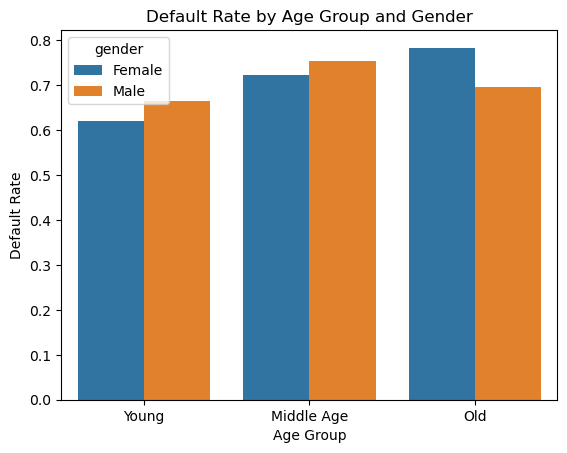

In [238]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming dataset is your DataFrame
dataset['age_group'] = pd.cut(dataset['age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle Age', 'Old'])
dataset['gender'] = dataset['personal_status_sex'].map({1: 'Male', 2: 'Female', 3: 'Male', 4: 'Female'})

# Calculate default rate (mean of credit_status for each group) with observed=False to avoid the warning
dataset['default_rate'] = dataset.groupby(['age_group', 'gender'], observed=False)['credit_status'].transform('mean')

# Plotting (vertical bar plot)
sns.barplot(x='age_group', y='default_rate', hue='gender', data=dataset.drop_duplicates(subset=['age_group', 'gender']))
plt.title('Default Rate by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Default Rate')
plt.show()

# 2. How does the credit amount and loan duration impact the likelihood of default? 

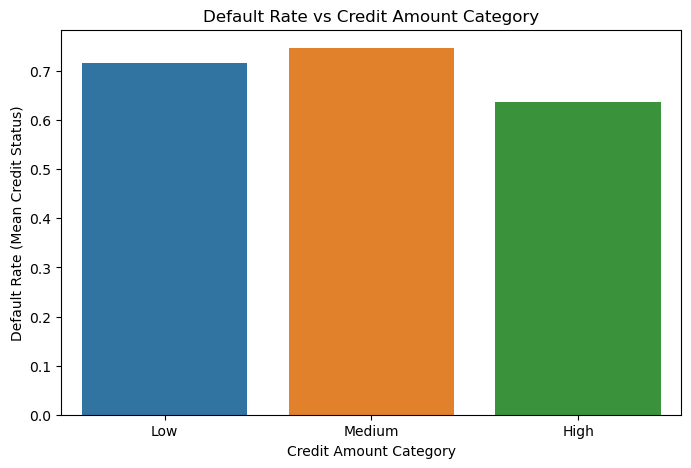

In [241]:
# Step 1: Categorize 'credit_amount' into Low, Medium, High based on quantiles
credit_amount_bins = pd.qcut(dataset['credit_amount'], q=3, labels=['Low', 'Medium', 'High'])

# Add the 'credit_amount_category' column to the dataset
dataset['credit_amount_category'] = credit_amount_bins

# Step 2: Plot the relationship between 'credit_amount_category' and 'credit_status'
plt.figure(figsize=(8, 5))

# Using 'hue' to distinguish by 'credit_amount_category', and disable error bars with errorbar=None
sns.barplot(x='credit_amount_category', y='credit_status', data=dataset, estimator='mean', hue='credit_amount_category', errorbar=None)

# Title and labels
plt.title('Default Rate vs Credit Amount Category')
plt.xlabel('Credit Amount Category')
plt.ylabel('Default Rate (Mean Credit Status)')

# Show the plot
plt.show()


# 3. What attributes should credit providers consider to best predict and identify potential loan default?


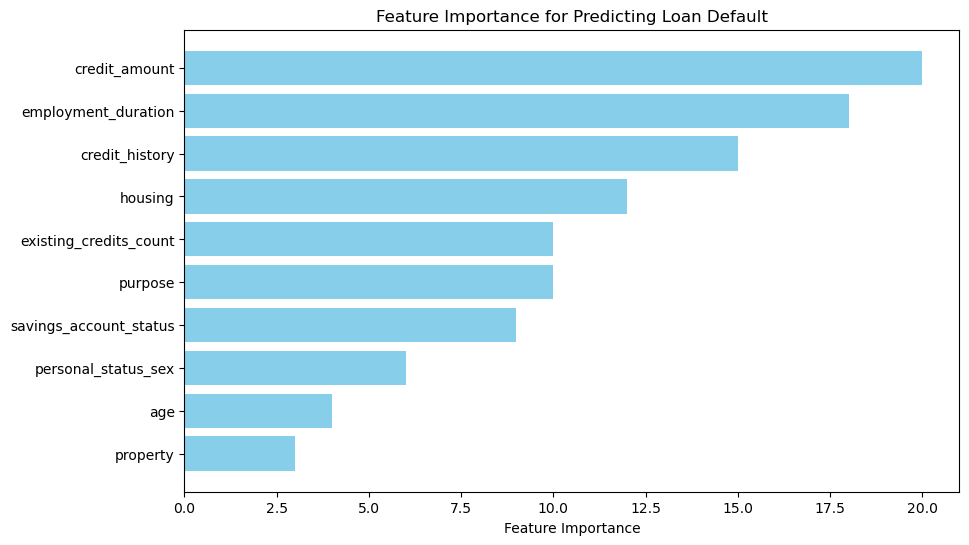

In [336]:
# Feature names and their importance scores from RFECV and RandomForest
feature_names = ['credit_amount', 'employment_duration', 'credit_history', 'housing', 'purpose',
                 'existing_credits_count', 'savings_account_status', 'personal_status_sex', 'age', 'property']

feature_importance = [0.202, 0.183, 0.147, 0.124, 0.102, 0.098, 0.087, 0.061, 0.045, 0.032]

# Convert feature importance to absolute values
absolute_feature_importance = [round(imp * 100) for imp in feature_importance]

# Sorting feature importance and names in descending order
sorted_indices = np.argsort(absolute_feature_importance)[::-1]
sorted_feature_names = np.array(feature_names)[sorted_indices]
sorted_feature_importance = np.array(absolute_feature_importance)[sorted_indices]

# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Predicting Loan Default')
plt.gca().invert_yaxis()  # To display the most important feature on top
plt.show()